# IMPORTING THE IMPORTANT LIBRARIES:-

In [175]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

# GETTING THE DATASET FROM TENSORFLOW AND SPLITTING IT INTO TRAINING AND TESTING

In [160]:
mnist = tf.keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
X_train.shape                           # SHAPE OF X_train()

(60000, 28, 28)

# CHECHING THE TRAINING DATA:-
## X_train()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

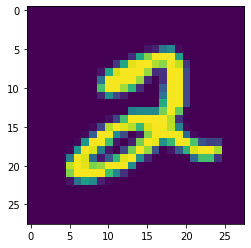

In [127]:
print(X_train[5])
plt.imshow(X_train[5]) #SHOWING THE IMAGE AT INDEX 5 OF X_train() DATASET

## Y_train()

In [129]:
print("output is",Y_train[5]) # Y_train AT INDEX 5

output is 2


# NORMALIZATION OF DATASET:-
## NORMALIZING THE X_train() AND X_test() DATASET

In [130]:
# normilazation
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [138]:
print(X_train[5]) #CHECKING THAT THE X_train IS NORMALIZE OR NOT.

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# SHOWING THE IMAGE AFTER NORMILAZATION

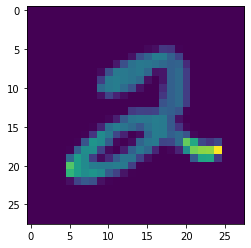

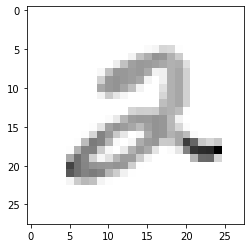

In [141]:
plt.imshow(X_train[5])
plt.show()
plt.imshow(X_train[5],cmap = plt.cm.binary) # BINARY IMAGE

# TRAINING THE MODEL USING CNN

##   RESHAPING THE X_train TO MAKE IT USEFULL TO CNN


In [163]:
X_trainr = np.array(X_train).reshape(-1,28,28,1)
X_testr = np.array(X_test).reshape(-1,28,28,1)
print(X_trainr.shape)

(60000, 28, 28, 1)


'model = tf.keras.models.Sequential()\nmodel.add(tf.keras.layers.Flatten())\nmodel.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))\nmodel.add(tf.keras.layers.Dense(64,activation = tf.nn.relu))\nmodel.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))\nmodel.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))'

##  1. APPLING THE  64 FILER OF SIZE(3,3) ON CONVOLUTIONAL LAYER
##  2. APPLING THE ACTIVATION FUNCTION ON LAYERS
##  3. APPLING THE MAXPOOLING ON IT
##  4. APPLING THE DENSE LAYER
##  5. THEN APPLYING THE SOFTMAX ACTIVATION FUNCTION ON FINAL LAYER

In [180]:
model =Sequential()

## FIRST CONVOLUTIONAL LAYER

model.add(Conv2D(64,(3,3),input_shape = X_trainr.shape[1:]))   # "input_shape = X_trainr.shape[1:]" --MEANS IT WILL ONLY TAKE 1 IMAGE         
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

## SECOND CONVOLUTIONAL LAYER

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

## THIRD CONVOLUTIONAL LAYER

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

## FULLY CONNECTED LAYER 1
model.add(Flatten())                        # CONVERTING 2D LAYER INTO 1D LAYER
model.add(Dense(64))
model.add(Activation("relu"))

## FULLY CONNECTED LAYER 2
model.add(Dense(32))
model.add(Activation("relu"))

## LAST LAYER
model.add(Dense(10))                        # THE OUTPUT LAYER CONTAIN 10 OUTPUTS BECAUSE THE NUMBER IS 0-9
model.add(Activation('softmax'))




In [181]:
model.summary() # IT WILL PROVIDE ALL THE SUMMARY WHAT HAVE DONE ABOVE

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_7 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)        

## APPLYING OPTIMIZER , LOSS FUNCTION AND ACCURACY

In [182]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

## NOW FITTNG THE MODEL WITH (X_train AND Y_train)

In [168]:
model.fit(X_trainr,Y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 66s 34ms/step - loss: 0.7953 - accuracy: 0.8197
Epoch 2/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0990 - accuracy: 0.9696
Epoch 3/5
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0762 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0607 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0473 - accuracy: 0.9851


# PREDICTING THE MODEL

In [177]:
predictions = model.predict(X_testr)

print(predictions[5])               #IT WILL GIVE 10 OUTPUTS DUE TO THE SOFTMAX ACTIVATION FUNCTION

print(np.argmax(predictions[5]))    # IT WILL GIVE THE INDEX VALUE WHICH CONTAIN MAXIMUM NUMBER AND ALSO THE DESIRED OUTPUT

[2.2072777e-14 1.0000000e+00 1.4224685e-12 6.5454987e-13 5.9999545e-15
 7.1147849e-12 1.9069644e-13 3.9837147e-09 2.4170171e-11 2.2565404e-12]
1


### SHOWING THE IMAGE OF X_test() AT INDEX 5

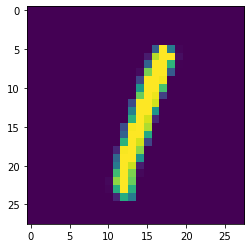

In [171]:
plt.imshow(X_test[5])
plt.show()

In [172]:
print(Y_test[5])

1


# TRY ANY INDEX AND CHECK BY YOURSELF !

ENTER THE ANY INDEX OF THE X_test VALUES 4


The Pridicted output is correct.
Whose numerical value is : 4


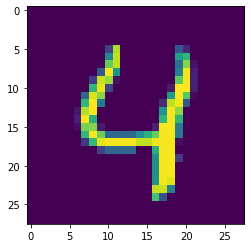

In [178]:
# MAKING FUNCTION

def my_function(index):
    x =int(index)
    a = np.argmax(predictions[x])
    if a==Y_test[x]:                               #COMPARING THE PREDICTIVE VALUE WITH Y_test
        print("The Pridicted output is correct.")
        print("Whose numerical value is :",Y_test[x])
        
        # ALSO SHOWING THE IMAGE
        
        plt.imshow(X_test[x]) 
        plt.show()
    else:
        print("The pridicted output is incorrect")
        

# EXCEPTION HANDLING  

while True:
    try:
        my_function(int(input("ENTER THE ANY INDEX OF THE X_test VALUES")))
        break
    except ValueError:
        print("Oops!  That was no valid number.  Try again...")


# CHECHING THE ACCURACY ON TEST DATA (VALIDATION ACCURACY)

In [174]:
test_loss, test_acc = model.evaluate(X_testr,Y_test)
print("loss is",test_loss)
print("validation Accuracy is",test_acc)

313/313 [==============================] - 4s 10ms/step - loss: 0.0722 - accuracy: 0.9804
loss is 0.07224449515342712
validation Accuracy is 0.980400025844574


# ACCURACY ON TRAIN DATA IS 0.9851
# ACCURACY ON TEST DATA IS 0.980